In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
gpus = 1 
metrics = np.loadtxt('metrics1.dat')
data = np.hstack((metrics,gpus*np.ones((len(metrics),1)),))

In [9]:
data = []
for log2gpus in range(4):
    gpus = int(2**log2gpus)
    metrics = np.loadtxt(f'metrics{gpus}.dat')
    epochs = len(metrics)
    data.append(np.hstack((metrics,gpus*np.ones((epochs,1)), np.arange(epochs)[:,np.newaxis])))

data = np.vstack(data)
df = pd.DataFrame(data,columns=['train_acc','train_loss','valid_acc','valid_loss','time_per_epochs','gpus','epoch'])

In [10]:
df.set_index('epoch', inplace=True)

,train_acc,train_loss,valid_acc,valid_loss,time_per_epochs,gpus,epoch
0,0.921659,0.921659,0.980769,0.053498,5.520081,1.0,0.0
1,0.969134,0.969134,0.985477,0.046677,1.554397,1.0,1.0
2,0.973173,0.973173,0.985577,0.046348,1.721284,1.0,2.0
3,0.976278,0.976278,0.986979,0.044493,1.546939,1.0,3.0
4,0.977847,0.977847,0.987580,0.039544,1.547734,1.0,4.0
...,...,...,...,...,...,...,...
59,0.106637,0.106637,0.097456,2.302331,1.967707,8.0,11.0
60,0.105575,0.105575,0.102865,2.302907,1.799066,8.0,12.0
61,0.106610,0.106610,0.102865,2.303925,1.770946,8.0,13.0
62,0.106353,0.106353,0.113482,2.309995,2.062879,8.0,14.0


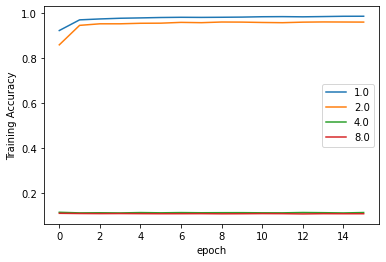

In [20]:
df.groupby('gpus')['train_acc'].plot(legend=True)
plt.ylabel('Training Accuracy')
plt.savefig('training-acc-by-gpu.png')

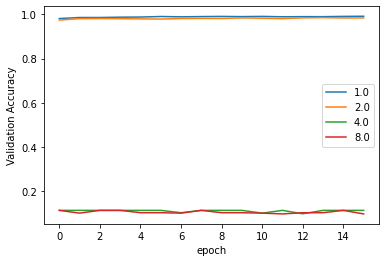

In [21]:
df.groupby('gpus')['valid_acc'].plot(legend=True)
plt.ylabel('Validation Accuracy')
plt.savefig('valid-acc-by-gpu.png')